<a href="https://colab.research.google.com/github/ftmhrahimi/Deep_Learning_F20_Assignments/blob/master/Assignment_Set_2/Part1/Cifar_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 10
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [5]:
# Load CIFAR-100 data
(input_train, target_train), (input_test, target_test) = cifar100.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

### **First Model**

In [36]:
# Create the model
import keras
model = Sequential()

model.add(keras.Input(shape=input_shape))  
model.add(Conv2D(32, 5, strides=2, activation="relu"))
model.add(Flatten())
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 14, 14, 32)        2432      
_________________________________________________________________
flatten_20 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_63 (Dense)             (None, 100)               627300    
Total params: 629,732
Trainable params: 629,732
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=20,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/20
800/800 [==============================] - 13s 17ms/step - loss: 2.0613 - accuracy: 0.4877 - val_loss: 4.1973 - val_accuracy: 0.1893
Epoch 2/20
800/800 [==============================] - 13s 16ms/step - loss: 2.0534 - accuracy: 0.4867 - val_loss: 4.2983 - val_accuracy: 0.1903
Epoch 3/20
800/800 [==============================] - 13s 16ms/step - loss: 2.0428 - accuracy: 0.4859 - val_loss: 4.3463 - val_accuracy: 0.1897
Epoch 4/20
800/800 [==============================] - 14s 17ms/step - loss: 2.0244 - accuracy: 0.4897 - val_loss: 4.3460 - val_accuracy: 0.1840
Epoch 5/20
800/800 [==============================] - 14s 17ms/step - loss: 2.0034 - accuracy: 0.4960 - val_loss: 4.4512 - val_accuracy: 0.1849
Epoch 6/20
800/800 [==============================] - 13s 16ms/step - loss: 1.9879 - accuracy: 0.4989 - val_loss: 4.4061 - val_accuracy: 0.1822
Epoch 7/20
800/800 [==============================] - 13s 16ms/step - loss: 1.9668 - accuracy: 0.5053 - val_loss: 4.4925 - val_accuracy:

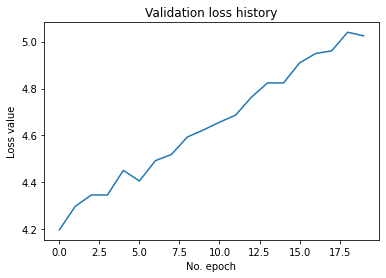

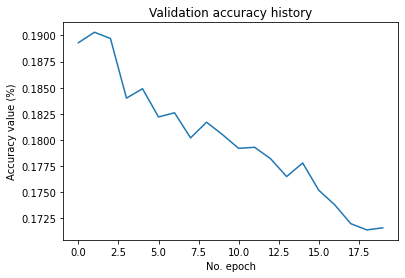

In [42]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## **Second Model**

In [9]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [7]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Epoch 1/10
800/800 [==============================] - 59s 74ms/step - loss: 4.0594 - accuracy: 0.0741 - val_loss: 3.7089 - val_accuracy: 0.1249
Epoch 2/10
800/800 [==============================] - 55s 69ms/step - loss: 3.4074 - accuracy: 0.1752 - val_loss: 3.2757 - val_accuracy: 0.2061
Epoch 3/10
800/800 [==============================] - 55s 69ms/step - loss: 3.0582 - accuracy: 0.2402 - val_loss: 3.0136 - val_accuracy: 0.2560
Epoch 4/10
800/800 [==============================] - 55s 68ms/step - loss: 2.8222 - accuracy: 0.2887 - val_loss: 2.8895 - val_accuracy: 0.2810
Epoch 5/10
800/800 [==============================] - 55s 68ms/step - loss: 2.6331 - accuracy: 0.3256 - val_loss: 2.7976 - val_accuracy: 0.3063
Epoch 6/10
800/800 [==============================] - 59s 73ms/step - loss: 2.4776 - accuracy: 0.3598 - val_loss: 2.7017 - val_accuracy: 0.3239
Epoch 7/10
800/800 [==============================] - 55s 68ms/step - loss: 2.3378 - accuracy: 0.3862 - val_loss: 2.6222 - val_accuracy:

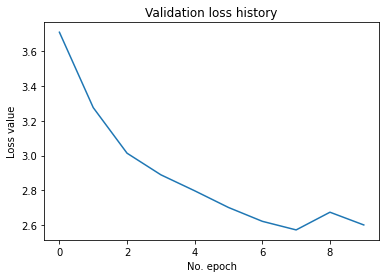

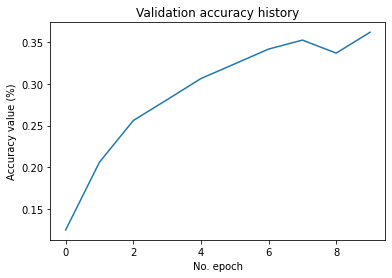

In [8]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()